In [29]:
from keras.datasets import cifar10

In [30]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

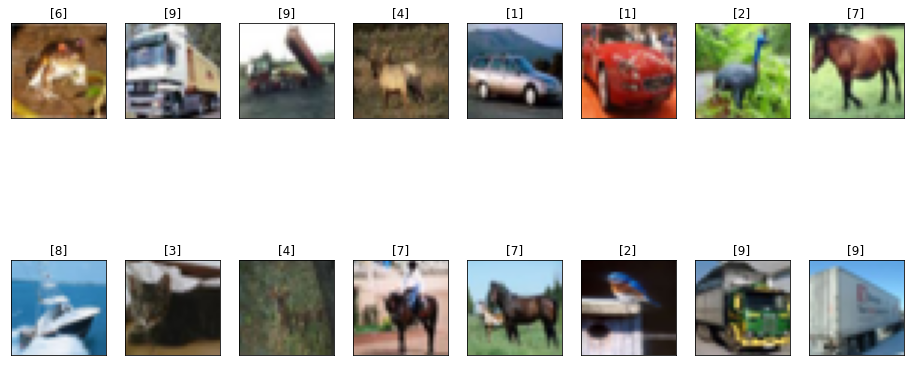

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
num_of_images = 16
for i in range(num_of_images):
  ax = fig.add_subplot(2,8,i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i])
  ax.set_title(str(y_train[i]))

In [32]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [33]:
from keras.models import  Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()
'''model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1042, input_dim=13 , activation="relu")) # number of features = 13
model.add(Dense(10, activation="softmax")) # output layer'''

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [37]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5624 - accuracy: 0.4274 - val_loss: 1.4158 - val_accuracy: 0.5014
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1972 - accuracy: 0.5708 - val_loss: 1.1286 - val_accuracy: 0.6004
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0240 - accuracy: 0.6374 - val_loss: 0.9763 - val_accuracy: 0.6548
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9112 - accuracy: 0.6797 - val_loss: 0.9522 - val_accuracy: 0.6706
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8291 - accuracy: 0.7084 - val_loss: 0.9002 - val_accuracy: 0.6892
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7734 - accuracy: 0.7285 - val_loss: 0.9074 - val_accuracy: 0.6822
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7270 - accuracy: 0.7441 - val_loss: 0.8685 -

313/313 - 4s - loss: 0.8885 - accuracy: 0.7016


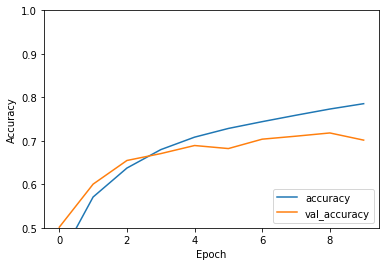

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [40]:
print(test_acc)

0.7016000151634216
